In [2]:
!pip install textblob

In [3]:
!pip install tweepy

In [4]:
import tweepy
from textblob import TextBlob
import pandas as pd

In [5]:
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [7]:
public_tweets = api.search('truvada')

In [8]:
print(TextBlob(public_tweets[0].text).sentiment)

Sentiment(polarity=0.4, subjectivity=0.4083333333333333)


In [9]:
subjectivityList = []
polarityList = []
tweetsList = []

for i in range(len(public_tweets)):
    tweetsList.append(public_tweets[i].text)
    
    sentiment=TextBlob(public_tweets[i].text).sentiment
    subjectivity= sentiment.subjectivity
    subjectivityList.append(subjectivity)
    
    polarity = sentiment.polarity
    polarityList.append(polarity)
    



In [10]:
tweetsList

["Here's a great example. Truvada (PrEP) was researched and produced with public dollars. The HIV epidemic has wiped… https://t.co/aT0flFgXqq",
 'RT @PeterJirak: @angryblkhoemo HIV can be prevented using Truvada/Descovy. Hep A and Hep B are vaccine preventable. So is HPV.\n\nMasks and h…',
 'RT @TTwerk15: When you get upgraded to Descovy from Truvada',
 '@IssaMeBrianO @WerewolfCoach Yep but Truvada goes generic next year and Descovy does not which is why Gilead is hea… https://t.co/Vc4TVkrnF1',
 '@WorstDadEver_ me to gaga: hey hunty, do you have any truvada i can borrow?',
 '@angryblkhoemo HIV can be prevented using Truvada/Descovy. Hep A and Hep B are vaccine preventable. So is HPV.\n\nMas… https://t.co/oSQ4YgjjiO',
 '@coolgwenstefani Truvada',
 '@timdooling @LeisureManof @CNN Truvada',
 "RT @sensualbrie: Before sex work I engaged in casual sex but my blood was accepted. Now I'm on Truvada which requires a range of STD tests…",
 'RT @JuliaLMarcus: Happy to share our new op-ed on Truva

In [11]:
subjectivityList

[0.4083333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8666666666666667,
 0.7272727272727273,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [12]:
polarityList

[0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5000000000000001,
 0.4681818181818182,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [13]:
sentimentDict = {
            "polarity": polarityList,
             "subjectivity": subjectivityList, 
             "tweets": tweetsList
            }

In [14]:
sentiment_df = pd.DataFrame(sentimentDict)
sentiment_df

,polarity,subjectivity,tweets
0,0.400000,0.408333,Here's a great example. Truvada (PrEP) was res...
1,0.000000,0.000000,RT @PeterJirak: @angryblkhoemo HIV can be prev...
2,0.000000,0.000000,RT @TTwerk15: When you get upgraded to Descovy...
3,0.000000,0.000000,@IssaMeBrianO @WerewolfCoach Yep but Truvada g...
4,0.000000,0.000000,"@WorstDadEver_ me to gaga: hey hunty, do you h..."
5,0.000000,0.000000,@angryblkhoemo HIV can be prevented using Truv...
6,0.000000,0.000000,@coolgwenstefani Truvada
7,0.000000,0.000000,@timdooling @LeisureManof @CNN Truvada
8,-0.500000,0.866667,RT @sensualbrie: Before sex work I engaged in ...
9,0.468182,0.727273,RT @JuliaLMarcus: Happy to share our new op-ed...


In [15]:
 for tweet in public_tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)

Here's a great example. Truvada (PrEP) was researched and produced with public dollars. The HIV epidemic has wiped… https://t.co/aT0flFgXqq
Sentiment(polarity=0.4, subjectivity=0.4083333333333333)
RT @PeterJirak: @angryblkhoemo HIV can be prevented using Truvada/Descovy. Hep A and Hep B are vaccine preventable. So is HPV.

Masks and h…
Sentiment(polarity=0.0, subjectivity=0.0)
RT @TTwerk15: When you get upgraded to Descovy from Truvada
Sentiment(polarity=0.0, subjectivity=0.0)
@IssaMeBrianO @WerewolfCoach Yep but Truvada goes generic next year and Descovy does not which is why Gilead is hea… https://t.co/Vc4TVkrnF1
Sentiment(polarity=0.0, subjectivity=0.0)
@WorstDadEver_ me to gaga: hey hunty, do you have any truvada i can borrow?
Sentiment(polarity=0.0, subjectivity=0.0)
@angryblkhoemo HIV can be prevented using Truvada/Descovy. Hep A and Hep B are vaccine preventable. So is HPV.

Mas… https://t.co/oSQ4YgjjiO
Sentiment(polarity=0.0, subjectivity=0.0)
@coolgwenstefani Truvada
Sentiment

In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



<IPython.core.display.Javascript object>


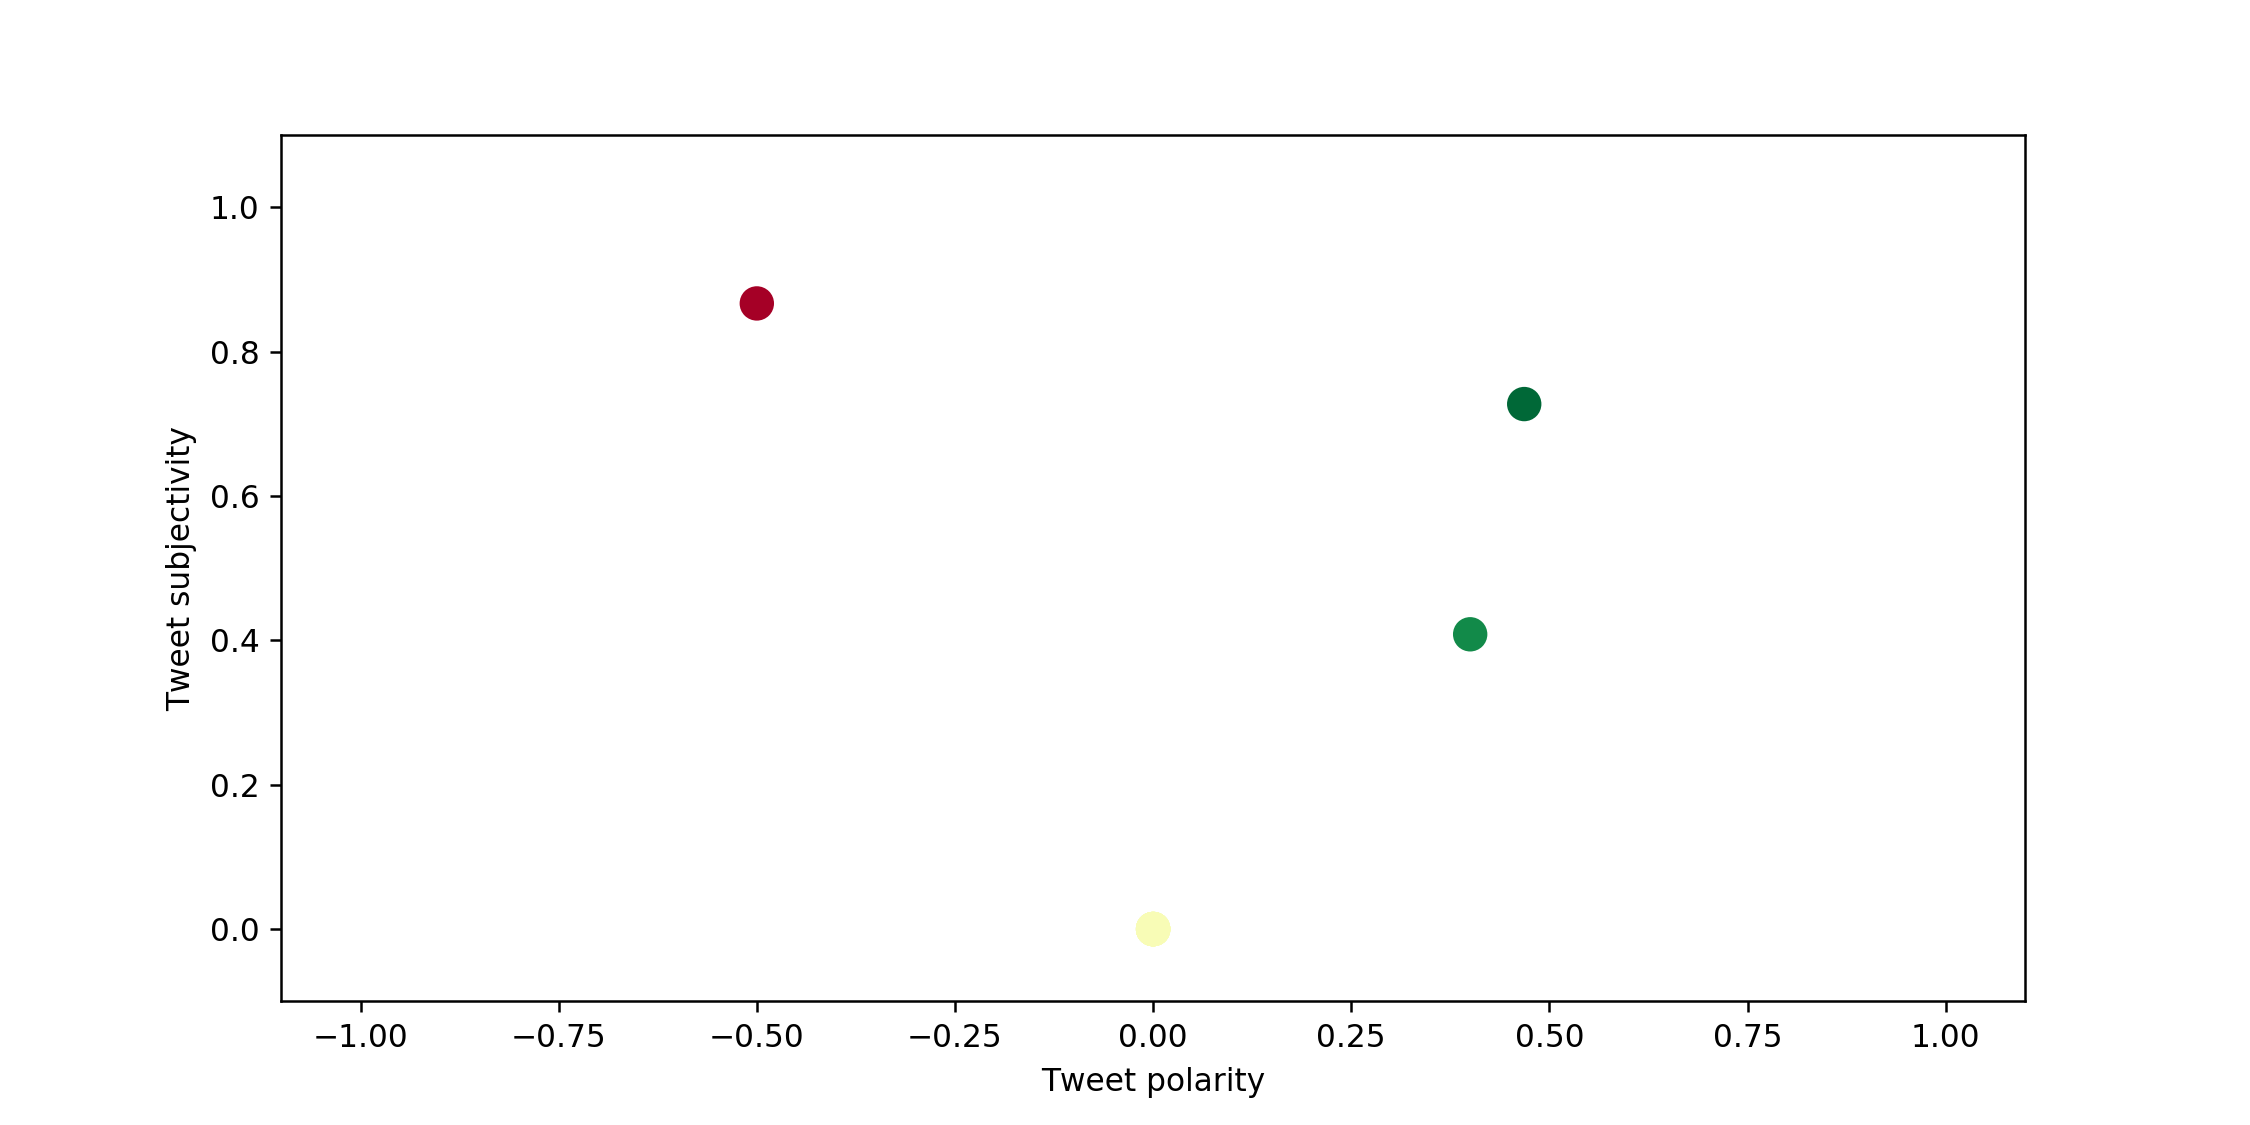

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(sentiment_df.polarity, sentiment_df.subjectivity, c=sentiment_df.polarity, s=100, cmap='RdYlGn')
plt.xlabel('Tweet polarity')
plt.ylabel('Tweet subjectivity')
plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()